In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


## Load and Check Data

In [2]:
df=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

* There are 301 sample and 9 features in dataset.


In [5]:
list=["Seller_Type","Transmission","Owner","Fuel_Type"]
for i in list:
    print(df[i].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


* As we can see above; Seller_type, Transmission, Owner, Fuel_Type are categorical variables.

In [6]:
#we should check missing and null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

* There is no missing or null values in dataset

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [9]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
#With this i drop Car_Name feature
#You can use drop function. This is a just another way to drop features.

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_dataset["Current_Year"]=2021
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


* The year feature shows us what year the cars were built. We will subtract 2021 from the years when cars were built to reach the age of cars. We will change the year feature with new feature which we will calculate

In [12]:
final_dataset["AgeCar"]=final_dataset["Current_Year"] - final_dataset["Year"]

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,AgeCar
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
final_dataset.drop(["Year"],inplace=True,axis=1)


In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,AgeCar
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
#I used current year feature, and now i will get rid of it.
final_dataset.drop(["Current_Year"],inplace=True,axis=1)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,AgeCar
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


* we will drop one of category of fuel_type to get_dummies function.
* So, we will have two category, when both of them are zero, it represent the third category.
* This method just an advice.

In [18]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
#The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,AgeCar,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


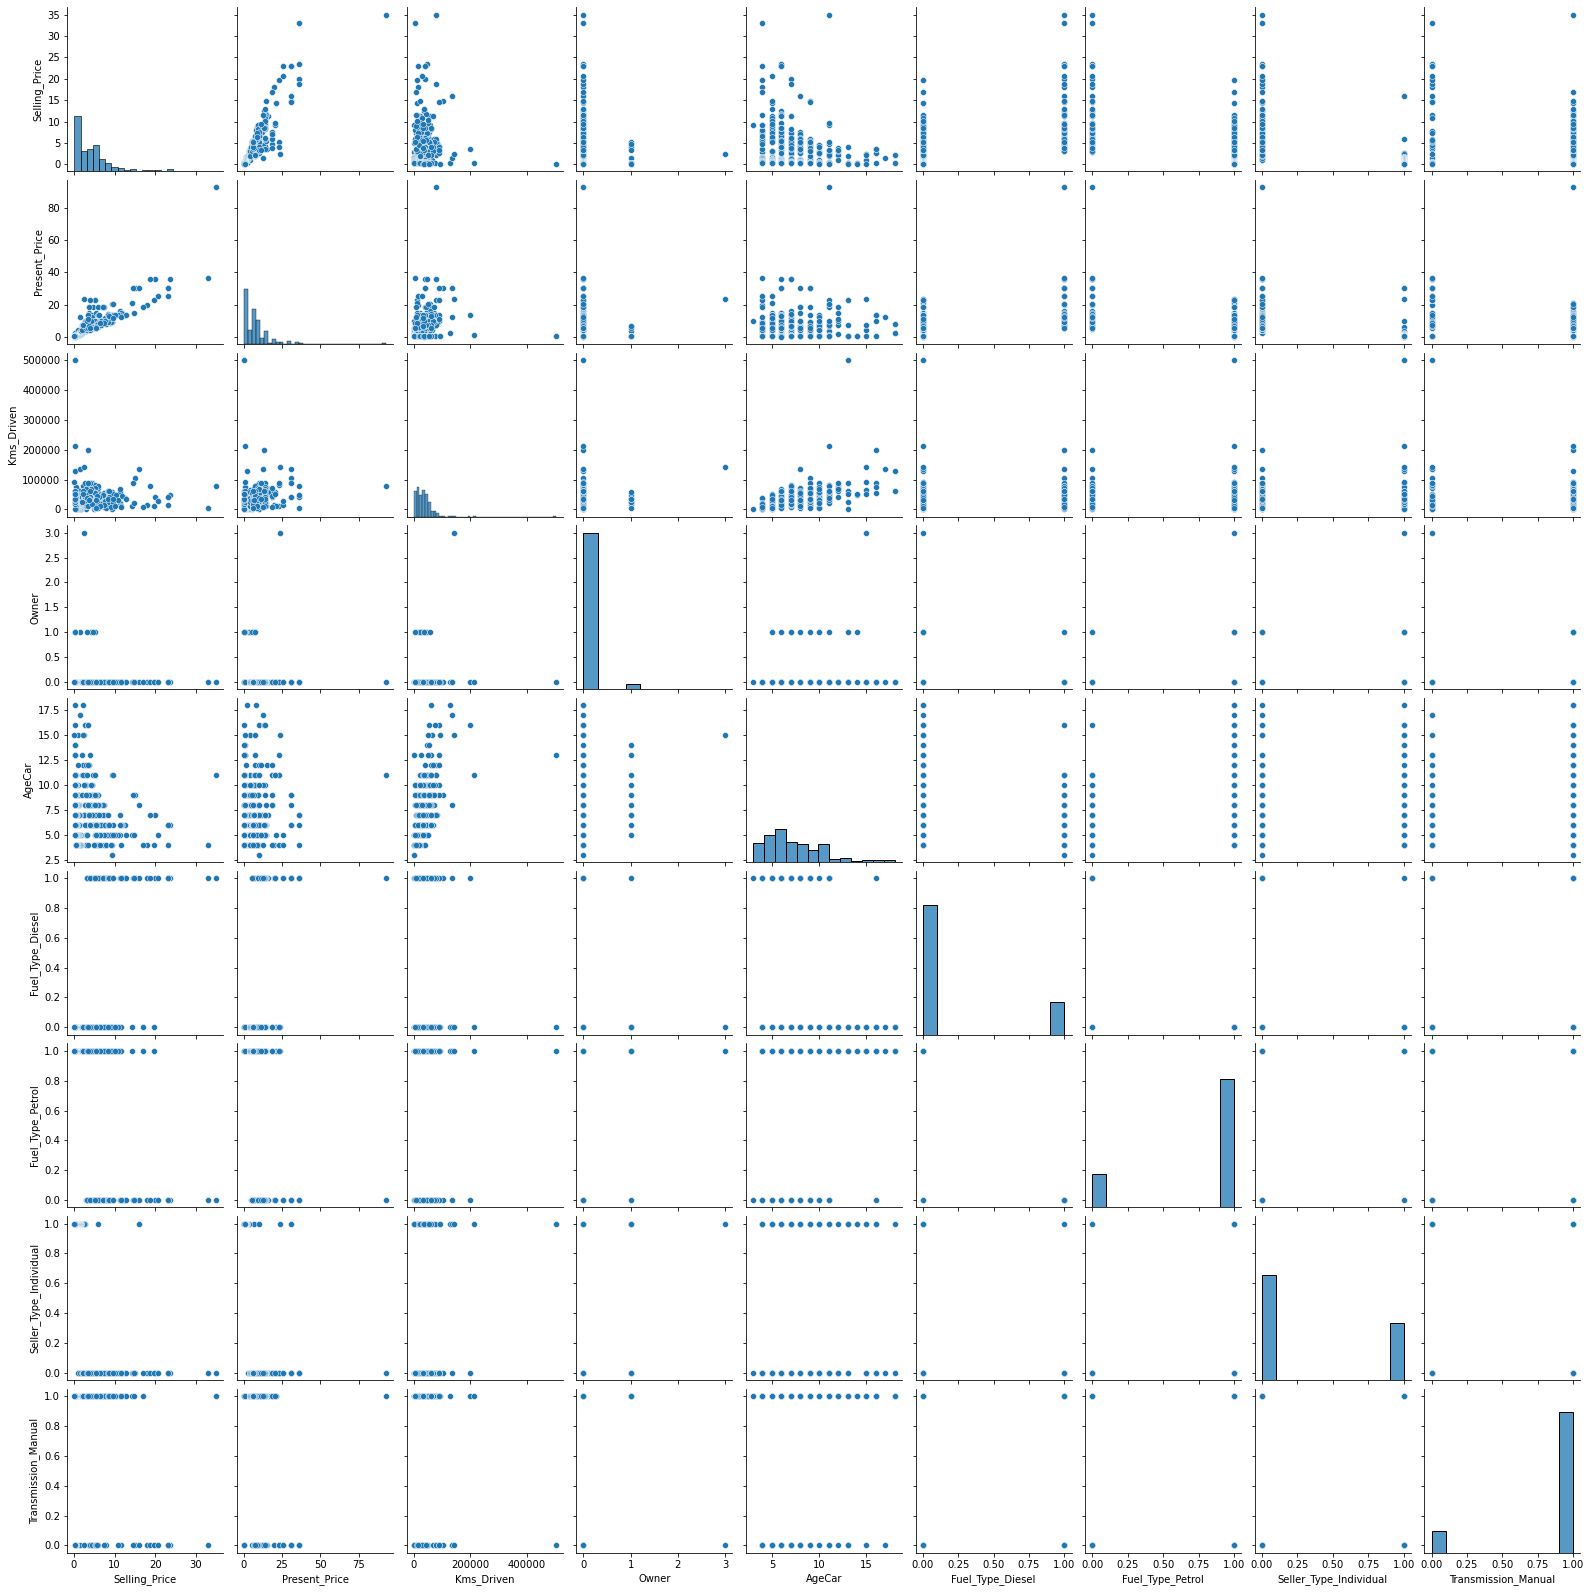

In [20]:
sns.pairplot(final_dataset)

## Visualization

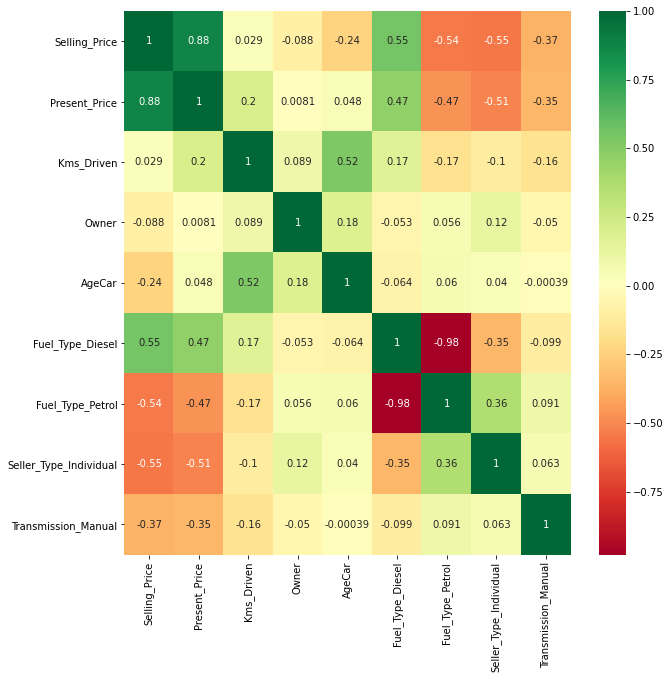

In [21]:
corr=final_dataset.corr()
top_corr_features=corr.index
plt.figure(figsize=(10,10))

g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#corr uses pearson correlation

* if two features high correlated we shoul drop one of them because they do same work.

### selling price - present price

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

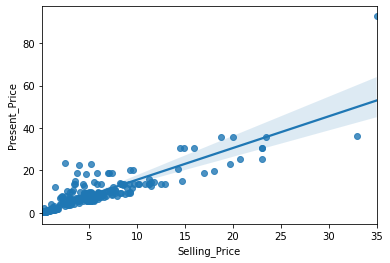

In [22]:
#Plot the relationship between two variables in a DataFrame with regplot
sns.regplot(x="Selling_Price",y="Present_Price",data=final_dataset)

### selling price - fuel type

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

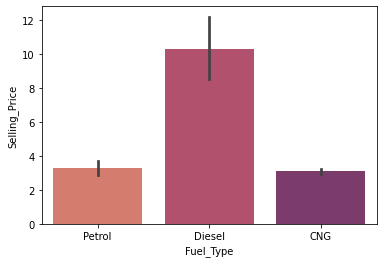

In [23]:
sns.barplot("Fuel_Type","Selling_Price",data=df,palette="flare")
# i used df instead of final_dataset in order to can use Fuel_type feature

* Cars have highest price which have diesel as fuel type. The rates of price of Petrol and Cng almost equal. 

### selling price - transmission

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

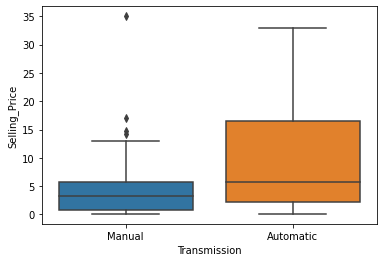

In [24]:
sns.boxplot(x="Transmission",y="Selling_Price",data=df)

### selling price-Seller type

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

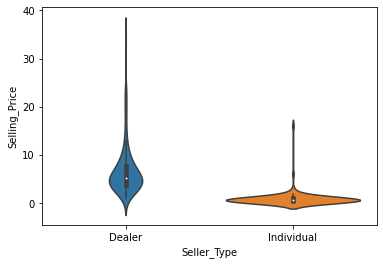

In [25]:
sns.violinplot(x="Seller_Type",y="Selling_Price",data=df)

### selling price - age

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AgeCar', ylabel='Selling_Price'>

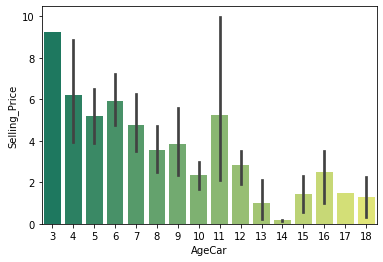

In [26]:
sns.barplot("AgeCar","Selling_Price",data=final_dataset,palette="summer")

In [27]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]


In [28]:
x.head()

,Present_Price,Kms_Driven,Owner,AgeCar,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

In [30]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)#For Random Forest Regression

[0.39841993 0.03742844 0.00179519 0.07895948 0.22602759 0.0108977
 0.116578   0.12989368]


* The first value belong to Present_price and so on
* The most important feature is Present_price

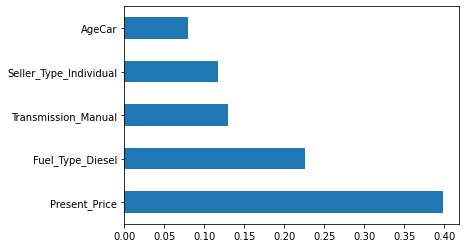

In [32]:
#visualizaiton for feature importance
f_importances=pd.Series(model.feature_importances_,index=x.columns)#pd.series x kolonlarını veri ile eşleştiriyor.
f_importances.nlargest(5).plot(kind='barh')
plt.show()

* This methods are good option if we have a lot of feataures.

## Modelling

In [33]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape

(240, 8)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [36]:
#Randomized Search
# linspace: Return evenly spaced numbers over a specified interval.
#The number of trees in the forest.
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#The number of features to consider when looking for the best split.
max_features=['auto','sqrt']

#The maximum depth of the tree.
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#The minimum number of samples required to split an internal node.
min_samples_split=[2,5,10,15,100]

#The minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,10]


In [37]:
from sklearn.model_selection import RandomizedSearchCV


In [38]:
random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf
             }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
rf=RandomForestRegressor()

In [40]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
#outliers dene farklı şeyler dene

In [43]:
predictions=rf_random.predict(x_test)
predictions

array([ 0.71368,  9.82371,  5.25008,  0.31353,  6.93668,  6.27135,
        1.01464,  0.60252,  0.5095 ,  6.2508 , 10.88804,  0.9127 ,
        7.5636 ,  0.61494,  5.4168 ,  2.99461,  0.99521, 10.92095,
        0.61701,  1.46116,  0.53735,  8.75891,  5.90213,  2.75841,
        0.55757,  3.5716 ,  5.29025,  3.08855,  1.1659 ,  1.07238,
        0.62462,  9.80119,  0.43024,  2.61235,  8.03313,  4.12815,
        6.10655,  4.79965,  3.13756,  5.2072 ,  3.91896,  4.04551,
        4.89045,  0.57076,  6.90021,  0.58274,  7.13578,  6.127  ,
        3.10375,  3.68939,  5.46134,  1.36955, 20.6895 , 20.97525,
        6.79589,  8.64937,  5.1683 ,  9.49705,  2.58239,  7.32764,
        0.30833])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

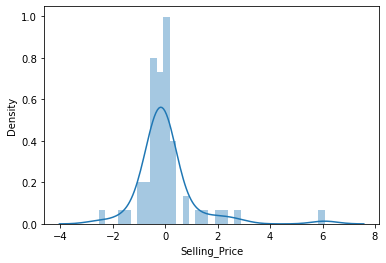

In [44]:
sns.distplot(y_test-predictions)

Text(0, 0.5, 'y_prediction')

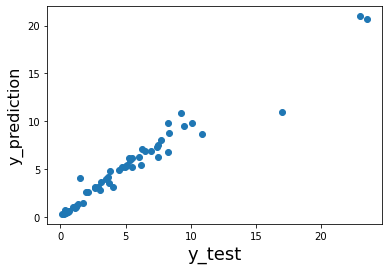

In [45]:
plt.scatter(y_test,predictions)
            
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_prediction', fontsize=16)

In [46]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predictions)
R2

0.9450184393400674